In [1]:
import os
import cv2
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import preprocessing, model_selection

In [2]:
data_path = './data/'
if not os.path.exists(data_path):
    os.makedirs(data_path, exist_ok=True)
    with zipfile.ZipFile('archive.zip', 'r') as zip_f:
        zip_f.extractall(data_path)

In [3]:
size=128
data = []
label = []
folder_path = f"{data_path}/flowers"
for folder in os.listdir(folder_path):
    for file in os.listdir(os.path.join(folder_path, folder)):
        if file.endswith('jpg'):
            label.append(folder)
            img = cv2.imread(os.path.join(folder_path, folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (size, size))
            data.append(im)
        else:
            continue

In [4]:
set(label)

{'daisy', 'dandelion', 'rose', 'sunflower', 'tulip'}

In [5]:
np.array(data).shape

(4317, 128, 128, 3)

In [6]:
len(label)

4317

In [7]:
data = np.array(data)
label = np.array(label)

In [8]:
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(label)
y = tf.keras.utils.to_categorical(y, 5)
x = data/255

In [9]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=32)

In [10]:
x_train.shape, x_test.shape

((3453, 128, 128, 3), (864, 128, 128, 3))

In [11]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(size, size, 3)))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))
          
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

In [57]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                         zoom_range=0.20,
                                                         width_shift_range=0.3,
                                                         height_shift_range=0.3,
                                                         horizontal_flip=True,
                                                         vertical_flip=True)

In [13]:
datagen.fit(x_train)

In [14]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.01),
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])
# tf.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

In [18]:
history_1 = model.fit(datagen.flow(x_train, y_train,batch_size=32),
                                             epochs=10,
                                             validation_data=(x_test, y_test),
                                             verbose=1)

Epoch 1/10
108/108 [==============================] - 10s 87ms/step - loss: 1.5987 - accuracy: 0.2436 - val_loss: 1.6024 - val_accuracy: 0.2442
Epoch 2/10
108/108 [==============================] - 9s 81ms/step - loss: 1.6004 - accuracy: 0.2375 - val_loss: 1.6012 - val_accuracy: 0.2442
Epoch 3/10
108/108 [==============================] - 9s 79ms/step - loss: 1.5990 - accuracy: 0.2436 - val_loss: 1.6018 - val_accuracy: 0.2442
Epoch 4/10
108/108 [==============================] - 9s 79ms/step - loss: 1.5992 - accuracy: 0.2421 - val_loss: 1.6028 - val_accuracy: 0.2442
Epoch 5/10
108/108 [==============================] - 9s 79ms/step - loss: 1.5995 - accuracy: 0.2436 - val_loss: 1.6025 - val_accuracy: 0.2442
Epoch 6/10
108/108 [==============================] - 9s 80ms/step - loss: 1.5989 - accuracy: 0.2360 - val_loss: 1.5996 - val_accuracy: 0.2442
Epoch 7/10
108/108 [==============================] - 9s 80ms/step - loss: 1.5993 - accuracy: 0.2436 - val_loss: 1.6018 - val_accuracy: 0.244

In [67]:
def plot_history(history, loss=True):
  title = 'loss' if loss else 'accuracy'
  plt.title(f'Train Validation {title}')
  plt.plot(range(1, num_epochs+1), history[f'{title}'], label='Train')
  plt.plot(range(1, num_epochs+1), history[f'val_{title}'], label='Validation')
  plt.xlabel('Trainig Epochs')
  plt.ylabel(title)
  plt.legend()
  plt.grid()
  plt.show()

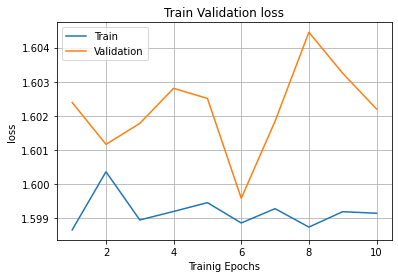

In [68]:
plot_history(history_1.history)

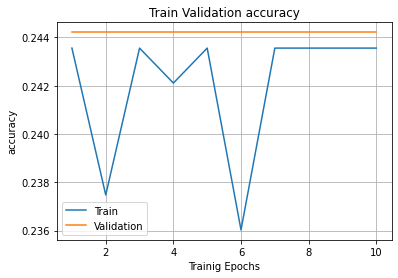

In [69]:
plot_history(history_1.history, False)

In [70]:
row, col = 6, 6
categories = np.sort(os.listdir(folder_path))
fix, ax = plt.subplots(row, cal, figsize=(30, 50))
for i in range(row):
    for j in range(col):
        k = np.random.randint(0, len(x_test), 1)
        true_y = categories[np.argmax(y_test[k])]
        pred = categories[np.argmax(model.predict(x_test)[k])]
        pred_color = 'green' if pred == true_y else 'red'
        ax[i, j].set_title(f"True: {true_y}", color='green')
        ax[i, j].set_xlabel(f"Prediction: {pred}", color=pred_color)
        ax[i, j].imshow(np.array(x_test)[k].reshape(size, size, 3), cmap='gray')
            

In [71]:
predictions = model.predict(x_test)
predictions

array([[0.18177794, 0.24340959, 0.1835326 , 0.15848334, 0.2327966 ],
       [0.18177794, 0.24340959, 0.1835326 , 0.15848334, 0.2327966 ],
       [0.18177794, 0.24340959, 0.1835326 , 0.15848334, 0.2327966 ],
       ...,
       [0.18177794, 0.24340959, 0.1835326 , 0.15848334, 0.2327966 ],
       [0.18177794, 0.24340959, 0.1835326 , 0.15848334, 0.2327966 ],
       [0.18177794, 0.24340959, 0.1835326 , 0.15848334, 0.2327966 ]],
      dtype=float32)

In [72]:
# true_grounds
model.predict(x_train)

array([[0.18177794, 0.24340959, 0.1835326 , 0.15848334, 0.2327966 ],
       [0.18177794, 0.24340959, 0.1835326 , 0.15848334, 0.2327966 ],
       [0.18177794, 0.24340959, 0.1835326 , 0.15848334, 0.2327966 ],
       ...,
       [0.18177794, 0.24340959, 0.1835326 , 0.15848334, 0.2327966 ],
       [0.18177794, 0.24340959, 0.1835326 , 0.15848334, 0.2327966 ],
       [0.18177794, 0.24340959, 0.1835326 , 0.15848334, 0.2327966 ]],
      dtype=float32)